In [1]:
import os
os.getcwd()

'/opt/notebooks'

In [2]:
import numpy as np
import configparser

In [3]:
config = configparser.ConfigParser()
config.read('project/config/config-docker.ini')

['project/config/config-docker.ini']

In [4]:
import sys
sys.path.insert(0, 'project/')
print(sys.path)

['project/', '/opt/notebooks', '/opt/conda/envs/music_clasification/lib/python37.zip', '/opt/conda/envs/music_clasification/lib/python3.7', '/opt/conda/envs/music_clasification/lib/python3.7/lib-dynload', '', '/opt/conda/envs/music_clasification/lib/python3.7/site-packages', '/opt/conda/envs/music_clasification/lib/python3.7/site-packages/IPython/extensions', '/root/.ipython']


In [5]:
from source.get_train_test_data import GetTrainTestData
from source.cnn_model import CNNModel
from source.aux_functions import create_confusion_matrix

Using TensorFlow backend.
/opt/conda/envs/music_clasification/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/envs/music_clasification/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/envs/music_clasification/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/envs/m

In [6]:
X_train, X_test, X_val, y_train, y_test, y_val = GetTrainTestData(config).read_dataset(choice="spec")

In [7]:
model = CNNModel()

In [8]:
model.load_model('project/logs/CNN/cnn_2020-04-18T17:40:23.162528.json/model.json')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 1247, 32)     320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 311, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 309, 64)       18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 77, 64)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 77, 64)         0         
_________________________________________________________________
flatten_1 (Flatten)  

In [9]:
model.load_weights('project/logs/CNN/cnn_2020-04-18T17:40:23.162528.json/weights.hdf5')

In [10]:
y_pred = model.predict_model(X_test)

Predecido:  [8 2 5 9 8 9 8 7 6 4 0 9 5 7 5 4 3 0 4 8 0 6 5 8 0 9 0 4 5 0 2 5 9 5 8 1 8
 7 7 4 5 6 0 5 1 8 3 9 5 8 6 8 6 5 1 6 4 4 6 1 5 9 0 4 8 4 7 8 3 0 9 2 0 9
 8 8 4 1 1 3 4 9 1 1 5 8 8 7 1 6 7 6 8 3 6 1 0 7 1 6 8 8 5 1 7 8 2 6 9 6 0
 9 0 8 8 4 4 0 1 4 1 7 0 4 0]


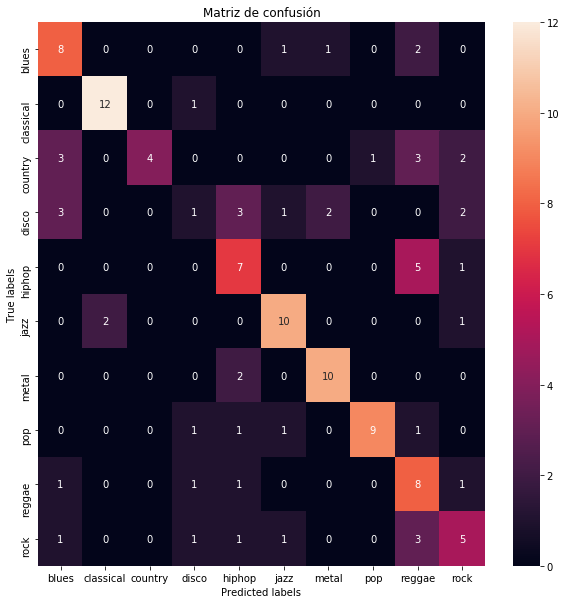

In [11]:
create_confusion_matrix(y_test, y_pred)